# Learning Objectives

Use Anyscale APIs to:
- Design effective prompts and scale them
- Implement zero-shot and few-shot prompts for classification and summarization
- Illustrate how LLMs could be used to evaluate the output of summarization tasks

# Setup

Anyscale provides seamless integration with the OpenAI API to provide access to open source models. This is beneficial because we can switch over to Open AI APIs if needed with minimal code changes.

In [1]:
!pip install -q openai==1.23.2 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


# Authentication

Paste your Anyscale API key in the secrets tab in the left panel.

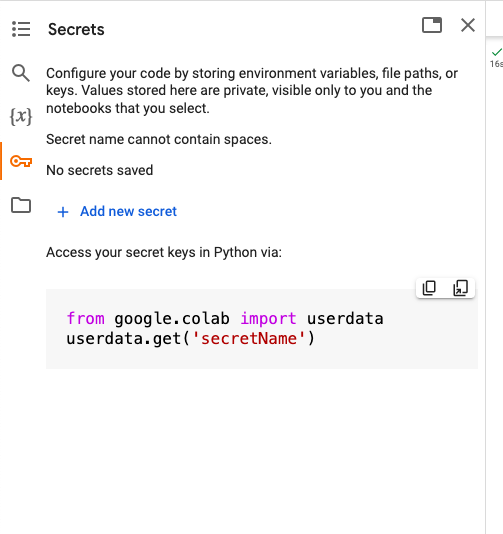

Ensure that you enable notebook access

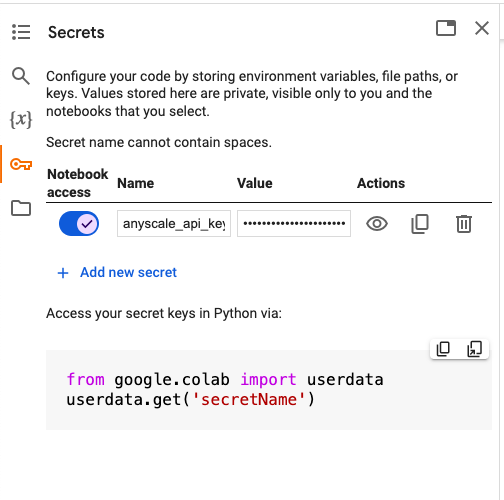

Note that this is a one-time process. The Anyscale API key is now available for all the notebooks linked to this Google account.

In [2]:
import pandas as pd

from openai import OpenAI
from datasets import load_dataset

from google.colab import userdata
from tqdm import tqdm

Now we can read the API key from Colab secrets. This way we do not expose our API keys in a notebook.

In [3]:
anyscale_api_key = userdata.get('anyscale_api_key')

In [4]:
client = OpenAI(
    base_url="https://api.endpoints.anyscale.com/v1",
    api_key=anyscale_api_key
)

In [5]:
model_name = 'mlabonne/NeuralHermes-2.5-Mistral-7B'

# ChatCompletions API

In [6]:
user_input = """
Assign sentiment to the following product review. Answer only in one word.

### Review:
The price is definitely justified for airpods pro 2.
Pros:

- noise cancellation is amazing
- Dolby Atmos perfect
- spatial audio works accurately, head tracking so good
- I can hear more instruments in the songs which I didn't hear it before😀
- the earpods volume will be lowered if you're start speaking to someone, I was suprised about this feature

Cons:

- touch controls placement is at the end of the earpods, means you have to slightly touch it to operate the volume or next song. Etc..since my fingers are big I found it little difficult operate
"""

In [7]:
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "user", "content": user_input}
    ]
)

Notice the above messages format. It is a list of dictionaries where the role of the message demarcates the input.

In [8]:
response.model_dump()

{'id': 'mlabonne/NeuralHermes-2.5-Mistral-7B-bbe18eae-f789-4d27-a1f3-380790375daa',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': 'Positive',
    'role': 'assistant',
    'function_call': None,
    'tool_calls': None,
    'tool_call_id': None}}],
 'created': 1716554771,
 'model': 'mlabonne/NeuralHermes-2.5-Mistral-7B',
 'object': 'text_completion',
 'system_fingerprint': None,
 'usage': {'completion_tokens': 3, 'prompt_tokens': 220, 'total_tokens': 223}}

We can extract the prediction from the model like so:

In [9]:
response.choices[0].message.content

'Positive'

The token usage metrics are also included in the response and can be extracted like so:

In [10]:
response.usage

CompletionUsage(completion_tokens=3, prompt_tokens=220, total_tokens=223)

# Prompt Parameters

Two important parameters modify the nature of output from the LLM - `temperature` and `max_tokens`. Temperature is the most important parameter that controls the variability in the output. In situations where a creative output is expected, having a high temperature is beneficial.

In [11]:
user_input = """
You are a marketer for the gaming company Razer.
Below is the metadata about the Razer Ornata V3 X gaming keyboard:
Brand: Razer
Series: Ornata V3 X
Item model number: RZ03-04470200-R3U1
Hardware Platform: PC
Operating System: Microsoft Windows
Item Weight: 2.97 pounds
Product Dimensions: 17.46 x 5.68 x 1.23 inches
Item Dimensions LxWxH: 17.46 x 5.68 x 1.23 inches
Color: Classic Black
Manufacturer: Razer
Language: English
ASIN: B09X6GJ691
Special Features: Low-Profile Keys, Spill Resistant, Ergonomic Wrist Rest, Chroma RGB Lighting, Silent Membrane Switches, Cable Routing Options
With this information, write a sleek "About this item" description that will be used on its Amazon product page.
Use bullet points to delineate key features mentioned in the description.
"""

In [12]:
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "user", "content": user_input}
    ],
    temperature=0.4
)

In [13]:
print(response.choices[0].message.content)

Introducing the Razer Ornata V3 X Gaming Keyboard - a masterpiece of innovation and style, tailored to elevate your gaming experience.

• Unleash the Power of Chroma RGB: Customize your keyboard with 16.8 million color options, synchronize lighting effects with other Chroma-enabled devices, and immerse yourself in a world of vibrant visuals.

• Low-Profile Keys for Precision: Experience the perfect blend of tactile feedback and speed with our low-profile mechanical switches. They're designed to provide ultimate responsiveness and accuracy for every keystroke.

• Spill-Resistant for Peace of Mind: Accidents happen, but not with the Ornata V3 X. Its advanced design ensures your keyboard can withstand liquid spills, giving you the confidence to game without worry.

• Ergonomic Wrist Rest for Comfort: The detachable, soft-touch wrist rest is designed to reduce fatigue and strain during those intense gaming sessions, ensuring your hands stay comfortable for hours on end.

• Silent Membrane 

We can modify the output length like so:

In [14]:
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "user", "content": user_input}
    ],
    temperature=0.4,
    max_tokens=800
)

In [15]:
print(response.choices[0].message.content)

Introducing the Razer Ornata V3 X Gaming Keyboard - a masterpiece of design and functionality, tailored to elevate your gaming experience.

- Sleek and Sturdy: Weighing in at 2.97 pounds, this keyboard boasts a robust construction that's built to withstand the rigors of intense gaming sessions.

- Ergonomic Comfort: The Ornata V3 X features an ergonomic wrist rest, ensuring that you can game for hours without experiencing discomfort or strain.

- Low-Profile Keys: The low-profile keys on this keyboard offer an optimal balance between responsiveness and tactile feedback, giving you the competitive edge you need in fast-paced games.

- Spill Resistant: Accidents happen, but worry not! With the Razer Ornata V3 X's spill-resistant design, you can focus on your game without fear of liquid damage.

- RGB Lighting Spectacle: Customize your keyboard with the stunning Chroma RGB lighting, offering 16.8 million color options to match your style or set the perfect gaming ambiance.

- Silent Membr

# Zero-shot Prompt

The key idea behind zero-shot prompts is that the model can leverage its general language understanding and knowledge to generate relevant responses, even for tasks it has not been explicitly trained on. This is achieved by providing the model with a prompt that includes a description or instruction about the desired task or topic, without any additional training data specific to that task.

Zero-shot prompts are useful in simple classification scenarios (for e.g., sentiment assignment).

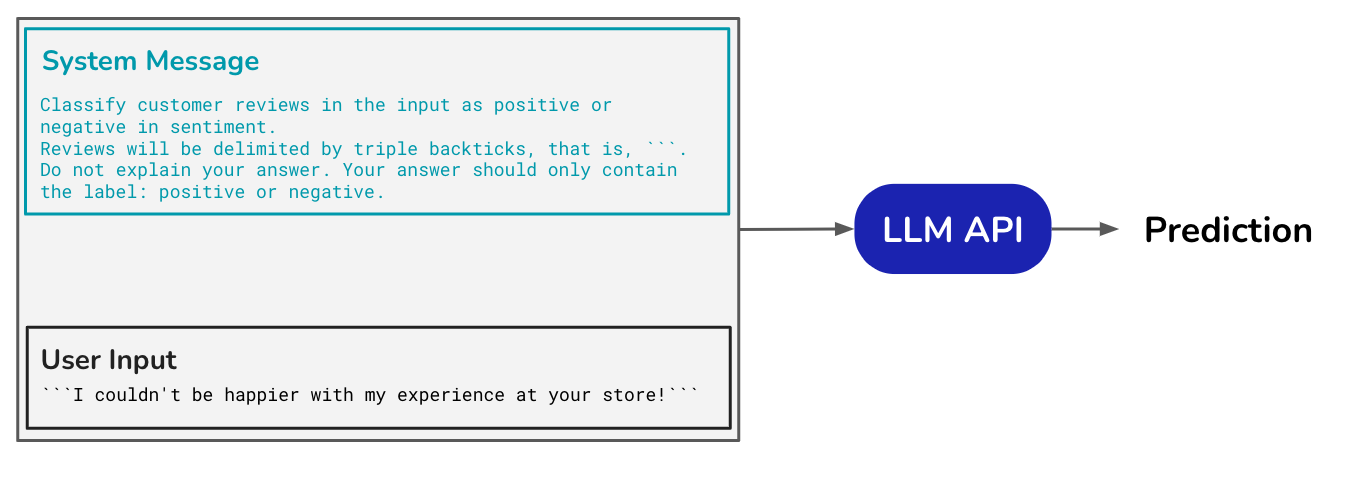

In [16]:
system_message = """
Classify customer reviews in the input as positive or negative in sentiment.
Do not explain your answer. Your answer should only contain the label: positive or negative.
"""

In [17]:
user_message_template = "###Review: {review}"

Using a template for user input allows us to replace the placeholder `{review}` dynamically using string formatting.

In [18]:
customer_review = """
I couldn't be happier with my experience at your store!
The staff went above and beyond to assist me, providing exceptional customer service.
They were friendly, knowledgeable, and genuinely eager to help.
The product I purchased exceeded my expectations and was exactly what I was looking for.
From start to finish, everything was seamless and enjoyable.
I will definitely be returning and recommending your store to all my friends and family.
Thank you for making my shopping experience so wonderful!
"""

In [19]:
user_input = user_message_template.format(review=customer_review)

Notice how we are using Python's string formatting methods to replace the variable `review` with `customer_review`.

In [20]:
zero_shot_prompt = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_input}
]

Notice how the prompt now has two roles: `system` and `user`.

In [21]:
response = client.chat.completions.create(
    model=model_name,
    messages=zero_shot_prompt,
    temperature=0
)

In [22]:
print(response.choices[0].message.content)

positive


We can now use the same user message template for a different review.

In [23]:
customer_review = """"
I am extremely disappointed with the service I received at your store!
The staff was rude and unhelpful, showing no regard for my concerns.
Not only did they ignore my requests for assistance, but they also had the audacity to speak to me condescendingly.
It's clear that your company values profit over customer satisfaction.
I will never shop here again and will make sure to spread the word about my awful experience.
You've lost a loyal customer, and I hope others steer clear of your establishment!
"""

In [24]:
user_input = user_message_template.format(review=customer_review)

zero_shot_prompt = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_input}
]

response = client.chat.completions.create(
    model=model_name,
    messages=zero_shot_prompt,
    temperature=0
)

print(response.choices[0].message.content)

negative


The performance of the prompt on a set of examples cna be measured using the usual classification metrics such as accuracy or F1 score.

# Few-shot prompt

The idea behind few-shot prompts is to adapt a pre-trained model using a small number of examples or demonstrations related to the target task. This allows the model to observe task-specific patterns and improve its performance on that particular task. The key idea here is to provide instructive examples of expected outputs.

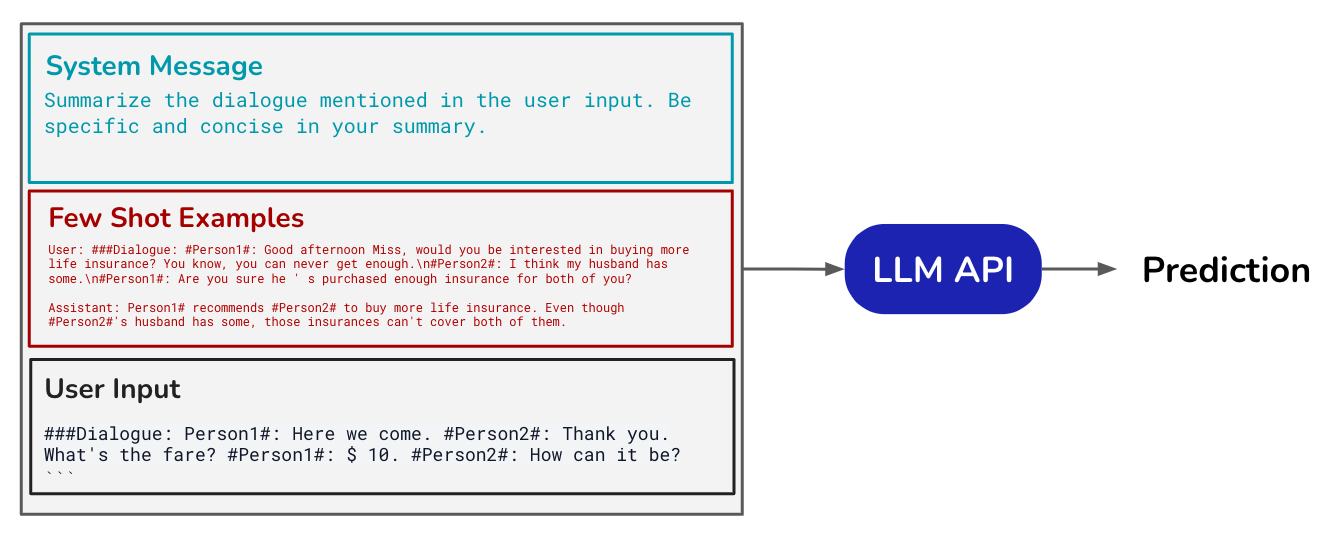

In [25]:
dataset = load_dataset("pgurazada1/dialogsum")

Generating examples split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating gold_examples split:   0%|          | 0/32 [00:00<?, ? examples/s]

Let us now assemble 4 examples from this dataset of 32 dialogue examples.

In [28]:
dialogue_summary_examples_df = dataset['examples'].to_pandas()

In [29]:
examples_df = dialogue_summary_examples_df.sample(4)

In [30]:
examples_df

,dialogue,summary
18,#Person1#: Don't be too sad. If you really thi...,#Person1# encourages #Person2# to divorce but ...
1,#Person1#: Hey. Owen! Have you gone on your fa...,Owen tells #Person1# he and his family went to...
9,#Person1#: Hello. May I help you?\n#Person2#: ...,#Person2# checks the arrival of #Person2#'s co...
23,#Person1#: When could we meet to discuss the p...,#Person1# and #Person2# schedules their projec...


We can now construct the few-shot prompt like so:

In [31]:
system_message = """
Summarize the dialogue mentioned in the user input. Be specific and concise in your summary.
"""

In [32]:
few_shot_prompt = [{'role':'system', 'content': system_message}]

We need to iterate over the rows of the examples DataFrame to append these examples as `user` and `assistant` messages to the few-shot prompt. We achieve this using the `iterrows` method.

In [33]:
for index, row in examples_df.iterrows():
    print('Example Dialogue:')
    print(row[0])
    print('Example Summary:')
    print(row[1])
    break

Example Dialogue:
#Person1#: Don't be too sad. If you really think that you have no feeling with him, then, in my opinion, getting divorced maybe is the best way to solve the problem.
#Person2#: I know clearly at the bottom of my heart. I just can't set my mind at rest because of the child. She's little. She cannot understand us and accept such truth.
#Person1#: Yeah, child is the matter. Don't tell Jenny the truth, only tell her the white lie. When she grows up, you find the suitable opportunity to tell her.
#Person2#: I see. OK.
Example Summary:
#Person1# encourages #Person2# to divorce but #Person2# is worried about her daughter. #Person1# suggests her telling the white lie.


In [34]:
for index, row in examples_df.iterrows():
    user_input_example = row[0]
    assistant_output_example = row[1]

    few_shot_prompt.append(
        {
            'role': 'user',
            'content': user_input_example
        }
    )

    few_shot_prompt.append(
        {
            'role': 'assistant',
            'content': assistant_output_example
        }
    )

In [35]:
few_shot_prompt

[{'role': 'system',
  'content': '\nSummarize the dialogue mentioned in the user input. Be specific and concise in your summary.\n'},
 {'role': 'user',
  'content': "#Person1#: Don't be too sad. If you really think that you have no feeling with him, then, in my opinion, getting divorced maybe is the best way to solve the problem.\n#Person2#: I know clearly at the bottom of my heart. I just can't set my mind at rest because of the child. She's little. She cannot understand us and accept such truth.\n#Person1#: Yeah, child is the matter. Don't tell Jenny the truth, only tell her the white lie. When she grows up, you find the suitable opportunity to tell her.\n#Person2#: I see. OK."},
 {'role': 'assistant',
  'content': '#Person1# encourages #Person2# to divorce but #Person2# is worried about her daughter. #Person1# suggests her telling the white lie.'},
 {'role': 'user',
  'content': "#Person1#: Hey. Owen! Have you gone on your family vacation yet?\n#Person2#: Oh, yes. I got so tired. My

Now, we have the few-shot prompt ready for use. Let us use this with one test example. Test examples are often referred to as *gold examples* since they are used to evaluate the prompt.

In [36]:
dialogue_summary_gold_examples_df = dataset['gold_examples'].to_pandas()

gold_examples_df = dialogue_summary_gold_examples_df.sample(1)

In [37]:
gold_examples_df

,dialogue,summary
19,#Person1#: It's partly your own fault. You sho...,#Person1# blames #Person2# for letting someone...


To extract the dialogue, we iterate on the rows as before.

In [38]:
for index, row in gold_examples_df.iterrows():
    gold_dialogue = row[0]
    gold_summary = row[1]

In [39]:
gold_dialogue

"#Person1#: It's partly your own fault. You should never let in anyone like that unless you're expecting him.\n#Person2#: It's all very well to say that, but someone cones to the door and says 'electricity' or 'gas' and you automatically think he is OK, especially if he shows you a card."

In [40]:
user_input = [{'role':'user', 'content': gold_dialogue}]

In [41]:
user_input

[{'role': 'user',
  'content': "#Person1#: It's partly your own fault. You should never let in anyone like that unless you're expecting him.\n#Person2#: It's all very well to say that, but someone cones to the door and says 'electricity' or 'gas' and you automatically think he is OK, especially if he shows you a card."}]

In [42]:
response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt + user_input,
    temperature=0
)

Notice how we are appending the user input to the few shot prompt assembled above.

In [43]:
print(response.choices[0].message.content)

#Person1# believes #Person2# should be more cautious about letting strangers in. #Person2# explains that people often trust utility workers.


In [44]:
gold_summary

'#Person1# blames #Person2# for letting someone in without much discretion.'

We can repeat this process for all the 32 gold examples in the dataset and ascertain the quality of summarization. However, an even better approach is to understand if the summary is a good reflection of the content of the dialogue (human summary might not be the ideal baseline). To accomplish this, we use a more powerful model to act as a judge. This process is depicted in the figure below. An alternative approach is to compare the predictions and ground truths using metrics such as BERTScore. The advantage of using LLMs as judges is that we do not need human baselines (that are costly to collect), while writing down the rubrics for assessment is usually an easier task.

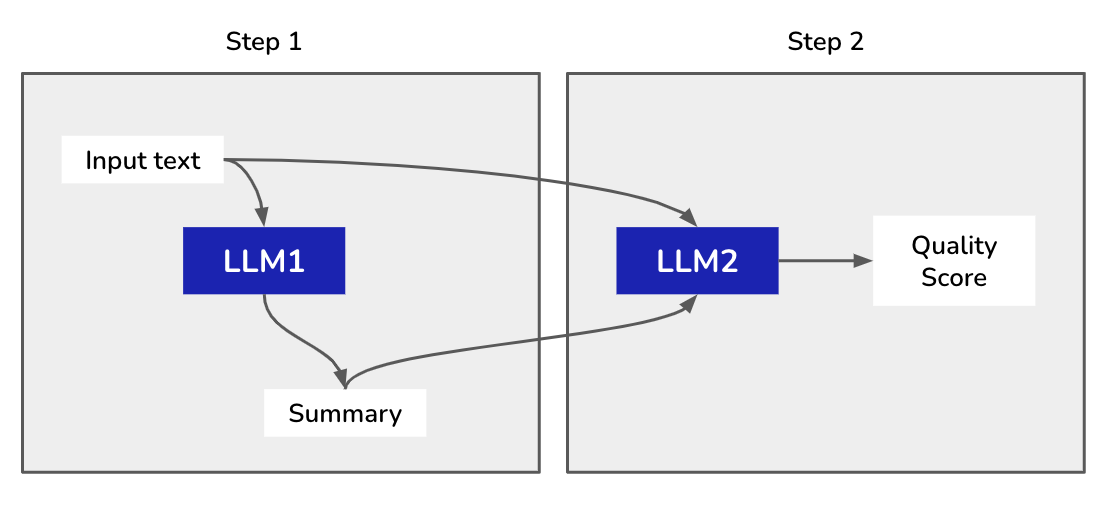

In [45]:
rater_model = "mistralai/Mixtral-8x7B-Instruct-v0.1"

In [46]:
rater_system_message = """
You are tasked with rating AI-generated summaries of dialogues based on the given metric.
You will be presented a dialogue and an AI generated summary of the dialogue as the input.
In the input, the dialogue will begin with ###Dialogue while the AI generated summary will begin with ###Summary.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the summary.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The summary should cover all the aspects that are majorly being discussed in the dialogue.

Instructions:
1. First write down the steps that are needed to evaluate the summary as per the metric.
2. Give a step-by-step explanation if the summary adheres to the metric considering the dialogues as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the summary using the evaluaton criteria and assign a score.
"""

In [47]:
rater_user_message_template = """
###Dialogue
{dialogue}

###Summary
{summary}
"""

In [48]:
predictions, ratings = [], []

In [49]:
for index, row in tqdm(dialogue_summary_gold_examples_df.iterrows()):
    gold_dialogue = row[0]
    gold_summary = row[1]

    user_input = [{'role':'user', 'content': gold_dialogue}]

    response = client.chat.completions.create(
        model=model_name,
        messages=few_shot_prompt + user_input
    )

    prediction = response.choices[0].message.content

    rater_prompt = [
        {'role': 'system',
         'content': rater_system_message
        },
        {
            'role': 'user',
            'content': rater_user_message_template.format(
                dialogue=gold_dialogue,
                summary=prediction
            )
        }
    ]

    response = client.chat.completions.create(
        model=rater_model,
        messages=rater_prompt
    )

    predictions.append(prediction)
    ratings.append(response.choices[0].message.content)

32it [05:17,  9.93s/it]


In [50]:
pd.DataFrame(
    {'dialogue': dialogue_summary_gold_examples_df.dialogue,
     'prediction': predictions,
     'rating': ratings
     }
)

,dialogue,prediction,rating
0,#Person1#: do you have any plans for dinner to...,#Person2# initially plans to eat a frozen pizz...,Steps to evaluate the summary as per the metr...
1,#Person1#: Are you an art aficionado?\n#Person...,"#Person1# shares their love for art, particula...",Steps to evaluate the summary:\n\n1. Identify...
2,"#Person1#: Sally,here is a letter for us. It's...",Tom writes a letter to Sally and John which #P...,Steps to evaluate the summary as per the metr...
3,"#Person1#: So, did I tell you about my New Yea...",#Person1# announces their New Year's resolutio...,Steps to evaluate the summary:\n1. Identify t...
4,#Person1#: I'm coming to pick up my ticket. Th...,#Person1# wants to buy a ticket and shows thei...,Steps to evaluate the summary as per the metr...
5,"#Person1#: Hi, Dan, I'm calling to check on th...",#Person1# calls #Person2# regarding a delayed ...,1. The steps to evaluate the summary as per t...
6,"#Person1#: Tom, I've got good news for you.\n#...",#Person1# informs #Person2# that he has won th...,Steps to evaluate the summary as per the metr...
7,#Person1#: How did your company's fundraiser g...,#Person2# describes their successful company's...,Steps to evaluate the summary as per the metr...
8,"#Person1#: OK, Mrs Thomas. I finished cleaning...",#Person1# completed various tasks for #Person2...,"Step 1: To evaluate the summary, I would foll..."
9,#Person1#: Mr. Wilson. We are very regretful a...,#Person1# apologizes for mistakes in goods and...,Step 1: To evaluate the summary as per the me...


These detailed ratings could be used to diagnose issues with the prompt or the model used.